In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import streamlit as st
import plotly.express as px

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gvoff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
import pandas as pd

# Step 1: Merge all CSV data files and create a DataFrame

# Assuming all CSV files have similar structure, adjust as needed

file_paths = [
    r"DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv", 
    r"DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv", 
    r"DDW_B18_1400_NIC_FINAL_STATE_MANIPUR-2011.csv", 
    r"DDW_B18_1500_NIC_FINAL_STATE_MIZORAM-2011.csv", 
    r"DDW_B18_1900_NIC_FINAL_STATE_WEST_BENGAL-2011.csv", 
    r"DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-2011.csv", 
    r"DDW_B18sc_1600_NIC_FINAL_STATE_TRIPURA-2011.csv", 
    r"DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv", 
    r"DDW_B18sc_2400_NIC_FINAL_STATE_GUJARAT-2011.csv", 
    r"DDW_B18sc_2700_NIC_FINAL_STATE_MAHARASHTRA-2011.csv", 
    r"DDW_B18sc_2900_NIC_FINAL_STATE_KARNATAKA-2011.csv", 
    r"DDW_B18sc_3000_NIC_FINAL_STATE_GOA-2011.csv", 
    r"DDW_B18sc_3200_NIC_FINAL_STATE_KERALA-2011.csv", 
    r"DDW_B18sc_3300_NIC_FINAL_STATE_TAMIL_NADU-2011.csv", 
    r"DDW_B18sc_3400_NIC_FINAL_STATE_PUDUCHERRY-2011.csv", 
    r"DDW_B18st_0200_NIC_FINAL_STATE_HIMACHAL_PRADESH-2011.csv", 
    r"DDW_B18st_0500_NIC_FINAL_STATE_UTTARAKHAND-2011.csv", 
    r"DDW_B18st_0900_NIC_FINAL_STATE_UTTAR_PRADESH-2011.csv", 
    r"DDW_B18st_1000_NIC_FINAL_STATE_BIHAR-2011.csv", 
    r"DDW_B18st_1100_NIC_FINAL_STATE_SIKKIM-2011.csv", 
    r"DDW_B18st_1300_NIC_FINAL_STATE_NAGALAND-2011.csv", 
    r"DDW_B18st_1800_NIC_FINAL_STATE_ASSAM-2011.csv", 
    r"DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv"
]

df_list = [pd.read_csv(file_path, encoding='latin1') for file_path in file_paths]

df = pd.concat(df_list, ignore_index=True)


In [203]:
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`21,`399,District - Malkangiri,`99,`000,`0000,Activities of extraterritorial organizations a...,574,315,259,...,38,1222,294,928,1176,286,890,46,8,38
195141,`21,`399,District - Malkangiri,`99,`991,`0000,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
195142,`21,`399,District - Malkangiri,`99,`991,`9910,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
195143,`21,`399,District - Malkangiri,`99,`992,`0000,Incomplete description/ Wrongly Classifed,139,49,90,...,16,636,92,544,618,88,530,18,4,14


In [204]:
df.shape

(195145, 25)

In [205]:
df.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0


In [206]:
print(df.columns)

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')


In [207]:
df.describe()

,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
count,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,195145.000000,195145.000000
mean,1.492138e+03,1.193171e+03,2.989664e+02,6.606187e+02,5.170353e+02,1.435834e+02,8.315188e+02,6.761358e+02,1.553830e+02,3.642672e+02,1.826322e+02,1.816350e+02,2.502286e+02,1.165241e+02,1.337045e+02,1.140386e+02,66.108094,47.930472
std,4.568169e+04,3.773917e+04,8.582019e+03,2.044436e+04,1.654295e+04,4.314446e+03,2.586781e+04,2.167339e+04,4.531593e+03,1.176940e+04,5.760575e+03,6.309699e+03,8.232274e+03,3.723078e+03,4.748460e+03,3.842889e+03,2132.581727,1803.271234
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2.800000e+01,2.300000e+01,3.000000e+00,1.200000e+01,8.000000e+00,0.000000e+00,1.200000e+01,9.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,1.880000e+02,1.450000e+02,2.400000e+01,7.400000e+01,5.600000e+01,8.000000e+00,8.600000e+01,6.700000e+01,1.200000e+01,2.800000e+01,1.800000e+01,6.000000e+00,1.400000e+01,8.000000e+00,3.000000e+00,9.000000e+00,6.000000,2.000000
max,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,1.323903e+06,8.849315e+06,7.354862e+06,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000


In [208]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [209]:

#checking the null values in this dataframe
df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [210]:
#checking the unique values of the all columns

for i in df.columns:
  print(i,":",df[i].nunique())

State Code : 23
District Code : 472
India/States : 491
Division : 89
Group : 241
Class : 423
NIC Name : 587
Main Workers - Total -  Persons : 8679
Main Workers - Total - Males : 7811
Main Workers - Total - Females : 3970
Main Workers - Rural -  Persons : 5767
Main Workers - Rural - Males : 5218
Main Workers - Rural - Females : 2694
Main Workers - Urban -  Persons : 6561
Main Workers - Urban - Males : 5934
Main Workers - Urban - Females : 2929
Marginal Workers - Total -  Persons : 4208
Marginal Workers - Total - Males : 3181
Marginal Workers - Total - Females : 2850
Marginal Workers - Rural -  Persons : 3406
Marginal Workers - Rural - Males : 2535
Marginal Workers - Rural - Females : 2379
Marginal Workers - Urban -  Persons : 2421
Marginal Workers - Urban - Males : 1951
Marginal Workers - Urban - Females : 1557


In [211]:
df.dtypes

State Code                             object
District Code                          object
India/States                           object
Division                               object
Group                                  object
Class                                  object
NIC Name                               object
Main Workers - Total -  Persons         int64
Main Workers - Total - Males            int64
Main Workers - Total - Females          int64
Main Workers - Rural -  Persons         int64
Main Workers - Rural - Males            int64
Main Workers - Rural - Females          int64
Main Workers - Urban -  Persons         int64
Main Workers - Urban - Males            int64
Main Workers - Urban - Females          int64
Marginal Workers - Total -  Persons     int64
Marginal Workers - Total - Males        int64
Marginal Workers - Total - Females      int64
Marginal Workers - Rural -  Persons     int64
Marginal Workers - Rural - Males        int64
Marginal Workers - Rural - Females

In [212]:
import pandas as pd

# Assuming 'df' is your DataFrame and columns are 'State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class'
columns_to_clean = ['State Code', 'District Code', 'Division', 'Group', 'Class']

# Remove backtick character (`) from each element in the specified columns
df[columns_to_clean] = df[columns_to_clean].applymap(lambda x: str(x).replace("`", ""))


In [213]:
pd.DataFrame(df)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,08,000,STATE - RAJASTHAN,00,000,0000,Total,9017944,7594737,1423207,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,08,000,STATE - RAJASTHAN,01,000,0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,08,000,STATE - RAJASTHAN,01,011,0000,Growing of non-perennial crops,12876,10547,2329,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,08,000,STATE - RAJASTHAN,01,011,0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,08,000,STATE - RAJASTHAN,01,011,0112,Growing of rice,79,71,8,...,2,13,4,9,11,2,9,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,21,399,District - Malkangiri,99,000,0000,Activities of extraterritorial organizations a...,574,315,259,...,38,1222,294,928,1176,286,890,46,8,38
195141,21,399,District - Malkangiri,99,991,0000,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
195142,21,399,District - Malkangiri,99,991,9910,Blank,435,266,169,...,22,586,202,384,558,198,360,28,4,24
195143,21,399,District - Malkangiri,99,992,0000,Incomplete description/ Wrongly Classifed,139,49,90,...,16,636,92,544,618,88,530,18,4,14


In [214]:
df.dtypes

State Code                             object
District Code                          object
India/States                           object
Division                               object
Group                                  object
Class                                  object
NIC Name                               object
Main Workers - Total -  Persons         int64
Main Workers - Total - Males            int64
Main Workers - Total - Females          int64
Main Workers - Rural -  Persons         int64
Main Workers - Rural - Males            int64
Main Workers - Rural - Females          int64
Main Workers - Urban -  Persons         int64
Main Workers - Urban - Males            int64
Main Workers - Urban - Females          int64
Marginal Workers - Total -  Persons     int64
Marginal Workers - Total - Males        int64
Marginal Workers - Total - Females      int64
Marginal Workers - Rural -  Persons     int64
Marginal Workers - Rural - Males        int64
Marginal Workers - Rural - Females

In [215]:
df.nunique()


State Code                               23
District Code                           472
India/States                            491
Division                                 89
Group                                   241
Class                                   423
NIC Name                                587
Main Workers - Total -  Persons        8679
Main Workers - Total - Males           7811
Main Workers - Total - Females         3970
Main Workers - Rural -  Persons        5767
Main Workers - Rural - Males           5218
Main Workers - Rural - Females         2694
Main Workers - Urban -  Persons        6561
Main Workers - Urban - Males           5934
Main Workers - Urban - Females         2929
Marginal Workers - Total -  Persons    4208
Marginal Workers - Total - Males       3181
Marginal Workers - Total - Females     2850
Marginal Workers - Rural -  Persons    3406
Marginal Workers - Rural - Males       2535
Marginal Workers - Rural - Females     2379
Marginal Workers - Urban -  Pers

In [216]:
##Dropping Unwanted Columns

df.drop(['State Code'], axis=1, inplace=True)
df.drop(['District Code'], axis=1, inplace=True)
df.drop(['Group'], axis=1, inplace=True)

In [217]:
df

,India/States,Division,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,STATE - RAJASTHAN,00,0000,Total,9017944,7594737,1423207,4469555,3664793,804762,...,618445,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490
1,STATE - RAJASTHAN,01,0000,"Crop and animal production, hunting and relate...",450766,201572,249194,391263,161879,229384,...,19810,408728,76106,332622,390864,71124,319740,17864,4982,12882
2,STATE - RAJASTHAN,01,0000,Growing of non-perennial crops,12876,10547,2329,5644,4328,1316,...,1013,9562,4051,5511,8147,3295,4852,1415,756,659
3,STATE - RAJASTHAN,01,0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,5195,3987,1208,...,942,9085,3883,5202,7777,3161,4616,1308,722,586
4,STATE - RAJASTHAN,01,0112,Growing of rice,79,71,8,48,42,6,...,2,13,4,9,11,2,9,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,District - Malkangiri,99,0000,Activities of extraterritorial organizations a...,574,315,259,498,277,221,...,38,1222,294,928,1176,286,890,46,8,38
195141,District - Malkangiri,99,0000,Blank,435,266,169,379,232,147,...,22,586,202,384,558,198,360,28,4,24
195142,District - Malkangiri,99,9910,Blank,435,266,169,379,232,147,...,22,586,202,384,558,198,360,28,4,24
195143,District - Malkangiri,99,0000,Incomplete description/ Wrongly Classifed,139,49,90,119,45,74,...,16,636,92,544,618,88,530,18,4,14


In [218]:
##Dropping the duplicates in the NIC column

df.drop_duplicates(subset=['NIC Name'], inplace=True)   
df['NIC Name'].shape

(587,)

In [221]:
#Remove punc

df['NIC Name_data'] = df['NIC Name'].str.replace("[^a-zA-Z0-9]", " ")

In [222]:
df2=df[['NIC Name_data']]

In [227]:
df

,India/States,Division,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,...,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,NIC Name_data
0,STATE - RAJASTHAN,00,0000,Total,9017944,7594737,1423207,4469555,3664793,804762,...,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490,Total
1,STATE - RAJASTHAN,01,0000,"Crop and animal production, hunting and relate...",450766,201572,249194,391263,161879,229384,...,408728,76106,332622,390864,71124,319740,17864,4982,12882,"Crop and animal production, hunting and relate..."
2,STATE - RAJASTHAN,01,0000,Growing of non-perennial crops,12876,10547,2329,5644,4328,1316,...,9562,4051,5511,8147,3295,4852,1415,756,659,Growing of non-perennial crops
3,STATE - RAJASTHAN,01,0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,5195,3987,1208,...,9085,3883,5202,7777,3161,4616,1308,722,586,"Growing of cereals (except rice), leguminous c..."
4,STATE - RAJASTHAN,01,0112,Growing of rice,79,71,8,48,42,6,...,13,4,9,11,2,9,2,2,0,Growing of rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,STATE - RAJASTHAN,99,0000,Incomplete description/ Wrongly Classifed,120886,65799,55087,67472,32473,34999,...,90655,27088,63567,67065,18302,48763,23590,8786,14804,Incomplete description/ Wrongly Classifed
21669,STATE - ARUNACHAL PRADESH,01,0115,Growing of tobacco,0,0,0,0,0,0,...,2,0,2,2,0,2,0,0,0,Growing of tobacco
33037,STATE - MIZORAM,01,0121,Growing of grapes,7,4,3,0,0,0,...,1,0,1,0,0,0,1,0,1,Growing of grapes
58919,STATE - JHARKHAND,07,0721,Mining of uranium and thorium ores,277,268,9,72,72,0,...,27,27,0,24,24,0,3,3,0,Mining of uranium and thorium ores


In [260]:
df2

,NIC Name_data
0,Total
1,"Crop and animal production, hunting and relate..."
2,Growing of non-perennial crops
3,"Growing of cereals (except rice), leguminous c..."
4,Growing of rice
...,...
746,Incomplete description/ Wrongly Classifed
21669,Growing of tobacco
33037,Growing of grapes
58919,Mining of uranium and thorium ores


In [230]:

df.loc[:,'NIC Name_data'] = df['NIC Name_data'].fillna("")

In [231]:
def replace_short_words(description):
    words = description.split()
    updated_words = [word if len(word) > 2 else '' for word in words]
    return ' '.join(updated_words)

df.loc[:,'NIC Name_data'] = df['NIC Name_data'].apply(replace_short_words)

In [233]:

df['NIC Name_data']

0                                                     Total
1         Crop and animal production, hunting and relate...
2                              Growing  non-perennial crops
3         Growing  cereals (except rice), leguminous cro...
4                                             Growing  rice
                                ...                        
746               Incomplete description/ Wrongly Classifed
21669                                      Growing  tobacco
33037                                       Growing  grapes
58919                      Mining  uranium and thorium ores
141691                                           Blank etc.
Name: NIC Name_data, Length: 587, dtype: object

In [234]:
df.loc[:,'NIC Name_data'] = [rev.lower() for rev in df['NIC Name_data']]

In [235]:

df['NIC Name_data']

0                                                     total
1         crop and animal production, hunting and relate...
2                              growing  non-perennial crops
3         growing  cereals (except rice), leguminous cro...
4                                             growing  rice
                                ...                        
746               incomplete description/ wrongly classifed
21669                                      growing  tobacco
33037                                       growing  grapes
58919                      mining  uranium and thorium ores
141691                                           blank etc.
Name: NIC Name_data, Length: 587, dtype: object

In [236]:
##Remove Stopwords

In [237]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(des):
  description_tokenized = word_tokenize(des)
  des_new = " ".join([i for i in description_tokenized if i not in stop_words])
  return des_new

df.loc[:,'NIC Name_data'] = [remove_stopwords(r) for r in df['NIC Name_data']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gvoff\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gvoff\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:

##Lemmatization

In [238]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)
  df['NIC Name_data'] = df['NIC Name_data'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gvoff\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gvoff\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [240]:
df2

,NIC Name_data
0,Total
1,"Crop and animal production, hunting and relate..."
2,Growing of non-perennial crops
3,"Growing of cereals (except rice), leguminous c..."
4,Growing of rice
...,...
746,Incomplete description/ Wrongly Classifed
21669,Growing of tobacco
33037,Growing of grapes
58919,Mining of uranium and thorium ores


In [268]:
df.to_csv('IHR_final2.csv', index=False)

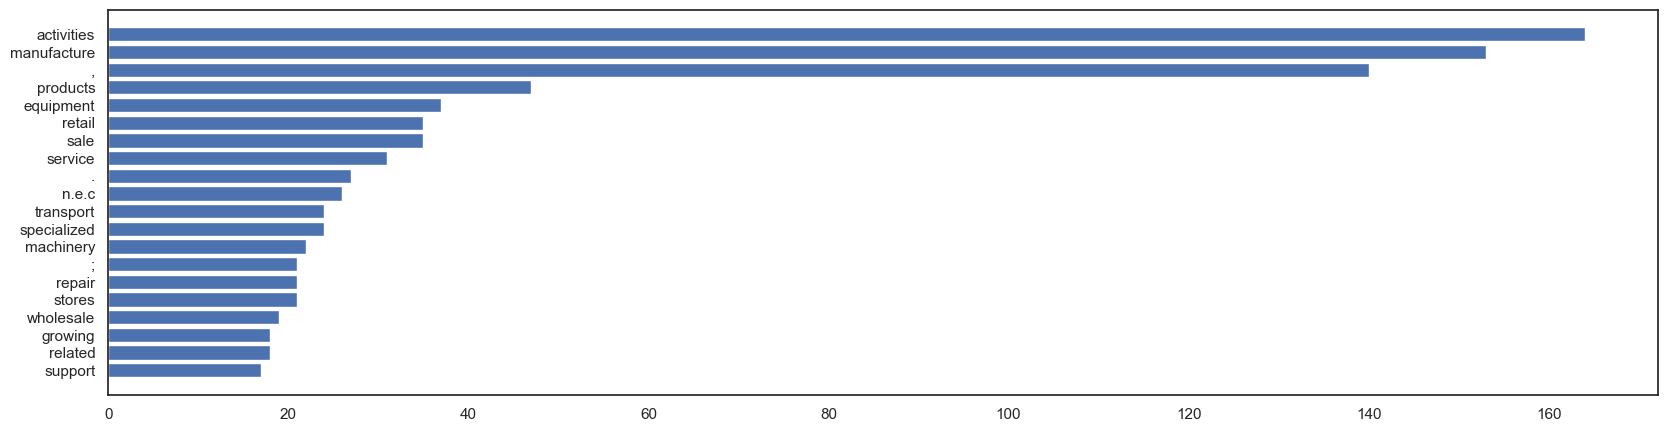

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

all_words = ' '.join([text for text in df['NIC Name_data']])
all_words = all_words.split()
words_df = FreqDist(all_words)
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns="count", n = 20)
words_df.sort_values('count', inplace = True)
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()
     

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(df['NIC Name_data']).toarray()
featureNames = tfidf.get_feature_names_out()
     

In [248]:
feature


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [249]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\gvoff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gvoff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gvoff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gvoff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

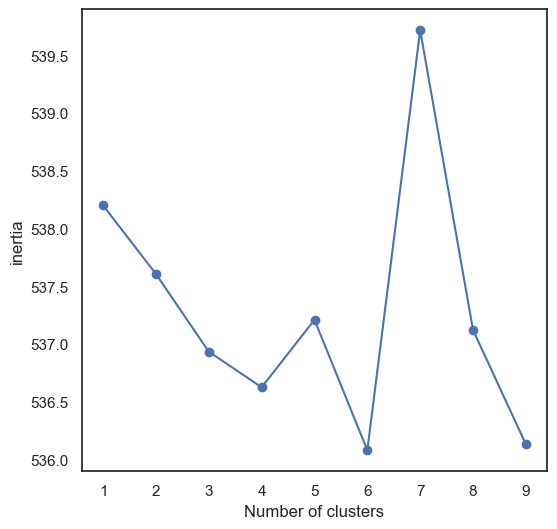

In [198]:
contat = []
list_k = list(range(1, 10))
for k in list_k:
  km = KMeans(n_clusters=5)
  km.fit(feature)
  contat.append(km.inertia_)
plt.figure(figsize=(6,6))
plt.plot(list_k, contat, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('inertia');
plt.show()

In [154]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix
X_train, X_test = train_test_split(feature, test_size=0.2, random_state=42)

# Fit K-Means on the training set
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Evaluate on the test set or validation set (if applicable)
labels_test = kmeans.predict(X_test)


C:\Users\gvoff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gvoff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [265]:
print(df.columns)

Index(['India/States', 'Division', 'Class', 'NIC Name',
       'Main Workers - Total -  Persons', 'Main Workers - Total - Males',
       'Main Workers - Total - Females', 'Main Workers - Rural -  Persons',
       'Main Workers - Rural - Males', 'Main Workers - Rural - Females',
       'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males',
       'Main Workers - Urban - Females', 'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'NIC Name_data', 'Business Type'],
      dtype='object')


In [270]:
import pickle
     

In [274]:
with open("IHR_clustering.pkl", "wb") as file:
    pickle.dump(feature, file)
     

In [275]:
# Load the clustering model from the file
with open("IHR_clustering.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [269]:
import streamlit as st
import pandas as pd
import plotly.express as px

# Function to categorize business types
def categorize_business(nic_name):
    if "retail" in nic_name.lower():
        return "Retail"
    elif "poultry" in nic_name.lower():
        return "Poultry"
    elif "agriculture" in nic_name.lower() or "farming" in nic_name.lower():
        return "Agriculture"
    elif "manufacturing" in nic_name.lower():
        return "Manufacturing"
    else:
        return "Other"

# Apply the categorization function to create a new column 'Business Type'
df['Business Type'] = df['NIC Name_data'].apply(categorize_business)

# Streamlit app
st.title("Workers Population Dashboard")

# Sidebar for filters
st.sidebar.header("Filters")

# Filter by Business Type
selected_business_types = st.sidebar.multiselect("Select Business Types", df['Business Type'].unique(), default=df['Business Type'].unique())

# Filter by Division
selected_divisions = st.sidebar.multiselect("Select Divisions", df['Division'].unique(), default=df['Division'].unique())

# Apply filters
filtered_df = df[(df['Business Type'].isin(selected_business_types)) & (df['Division'].isin(selected_divisions))]

# Visualization using Plotly Express
fig = px.bar(filtered_df, x='NIC Name_data', y='Main Workers - Total -  Persons', color='Business Type',
             labels={'Main Workers - Total - Persons': 'Total Workers'},
             title='Workers Population by Business Type',
             height=600)

# Show the plot
st.plotly_chart(fig)


DeltaGenerator()